In [2]:
from astropy import units as u
from astropy import constants as const
import numpy as np
from matplotlib import pyplot as plt

### Dhruv's Homework

Starting with the initial setup in Turner 2004 (https://iopscience.iop.org/article/10.1086/386545/pdf), create a plot for the vertical density profile for an $\alpha$ disk (see lecture 21) as in the paper’s described initial conditions. Compare to figure 1 in the paper and describe any differences you see. What might you attribute them to?

> The domain is a small patch of disk, centered 100 Schwarzschild radii, $R_s = 2 G M / c^2$, out from a black hole of $M = 10^8 M_{\odot}$, and corotating at the central Keplerian orbital frequency $\Omega_0$. The local shearing-box approximation is used, and Cartesian coordinates correspond to the distance from the origin (x, y, z) along the radial, orbital, and vertical directions, respectively (Hawley, Gammie, & Balbus 1995). The domain extends $1.5 R_s$ along the radial direction, $6 R_s$ along the orbit, and $6 R_s$ on either side of the midplane and is divided into 32 x 64 x 256 zones.

...

> The initial condition is a Shakura & Sunyaev (1973) model accreting at 10% of the Eddington value for luminous efficiency 0.1. 
In constructing the initial state only, the ratio a of stress to total pressure is set to 0.01. 
The resulting surface density is $1.1 \times 10^{6}$ g cm$^{-2}$. 
The half-thickness H of the Shakura-Sunyaev model is $\frac{3}{4} R_s$. 
The domain outside the model is filled with an ambient medium of the floor density. 
Since gravity increases with height, while radiation flux is independent of height outside the Shakura-Sunyaev model, the ambient medium is out of hydrostatic balance and falls toward the midplane when the calculation starts.

> The magnetic field is given zero net vertical flux, so that outflows can completely demagnetize the domain. 
The starting configuration is an azimuthal flux tube of circular cross section, with radius $0.75 H$. 
The axis is offset from domain center by $+0.1H$ in $x$ and $+0.1H$ in $z$. 
Field strength in the tube is uniform at 2660 G, corresponding to 4% of initial midplane gas plus radiation pressure. 
The tube is twisted about its axis, giving the maximum poloidal component 661 G. 
The maximum vertical MRI wavelength of eight grid zones is adequately resolved. The domain-mean radial field is zero, and the mean azimuthal field of $159 G$ is much less than values that develop later. 
The calculation is begun with a small random poloidal
velocity in each grid zone. The maximum amplitude of each
velocity component is 1% of the midplane radiation sound
speed.

$\rho = \rho_c exp \left(\frac{-z^2}{2 H^2}\right)$

or...

$\rho = \rho_c exp \left(\frac{-|z|}{H}\right)$


In [24]:
def density(rhoc, z, H):
    return rhoc * np.exp(-z**2/(2*H**2))

def alt_density(rhoc, z, H):
    return rhoc * np.exp(-np.abs(z)/H)

def schwar(M):
    return 2 * const.G * M / const.c**2

In [29]:
rhoc = 10**(-8) * u.gram * u.cm**(-3)
#sigma = 1.1 * 10**(-6) * u.gram * u.cm**(-3)
M = 10**8 * u.M_sun
Rs = schwar(M)
H = 3/4 * Rs
z = np.linspace(-6 * Rs.value, 6 * Rs.value, num=100)
rho = density(rhoc, z, H.value)

Text(0, 0.5, 'Density/10$^{-8}$ g cm$^{-3}$')

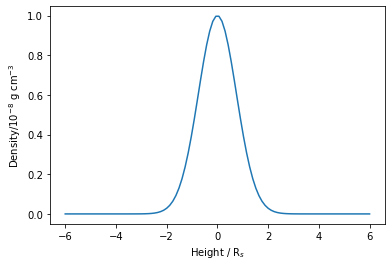

In [33]:
plt.plot(z/Rs, rho/10**(-8))
plt.xlabel('Height / R$_s$')
plt.ylabel('Density/10$^{-8}$ g cm$^{-3}$')

The difference between this plot of the vertical density profile for an $\alpha$ disk and Figure 1 in Turner 2004 is the height of the peak in density, which is because I chose a different value of $\rho_c = 10^{-8}$ g cm$^{-3}$. Figure 1 in Turner 2004 also seems to have a slightly wider FWHM, which may be due to the higher peak as well. The plot is also missing the magnetic pressure.